<a href="https://colab.research.google.com/github/RogerHeederer/ML_practice_MyFirstML_B/blob/master/MultiPerceptronXOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source reference : https://github.com/wikibook/machine-learnin

위 레퍼런스를 참조하여 공부하였으며, 필요하다고 생각되는 부분에 추가적인 설명 및 그림들을 덧붙였습니다.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

tf.random.set_seed(678)

import numpy as np

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
# 입력 벡터 (4,2)  출력 벡터 (1,4)
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = np.array([0., 1., 1., 0.])

In [ ]:
model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_dim=2)) #첫번째 히든 레이어. 뉴런 2개
model.add(Dense(units=1, activation='sigmoid')) #두번째 히든 레이어. 뉴런 1개

In [ ]:
# 손실함수를 정하고, 그 손실함수를 최적화 하는 도구(옵티마이져)를 sgd로 정함. stochastic gradient descending
# 손실함수를 최적화 한다는 얘기는, 모델이 예측한 값과 실제 정답 y의 차이를 최대한 줄인다!는 얘기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


**파라미터에 대한 설명**

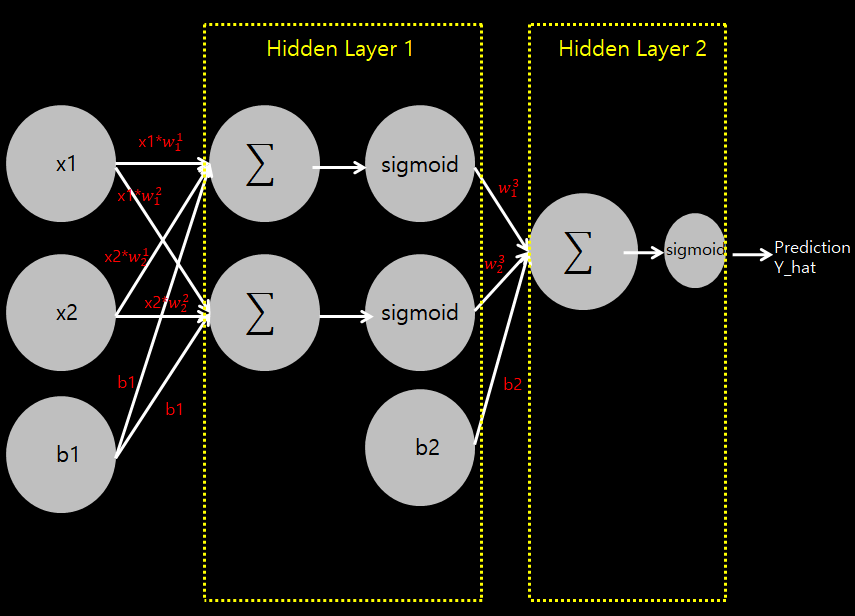

**위 그림의 빨간색 글자들이 파라미터이다.**
- 첫번째 레이어에 들어가는 파라미터의 갯수는 총 6개
- 두번째 레이어에 들어가는 파라미터의 갯수는 총 3개

**웨이트 기호에 대한 설명은 다음과 같다**

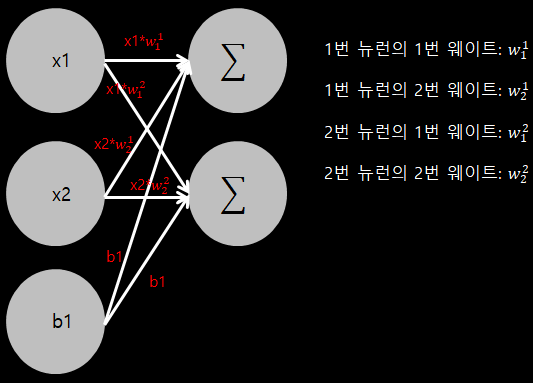

In [ ]:
model.fit(X,y, epochs=20000, batch_size=4, verbose=0) #verbose를 1로 하면 트레이닝 과정 볼 수 있다

In [ ]:
print(model.predict(X,batch_size=4))

[[0.06085929]
 [0.94197905]
 [0.94220614]
 [0.07106161]]


In [ ]:
#첫번째 레이어 파라미터
print("first layer weights: ",model.layers[0].get_weights()[0])
print("first layer bias: ",model.layers[0].get_weights()[1])

first layer weights:  [[3.5763602 5.804214 ]
 [3.5690916 5.7559724]]
first layer bias:  [-5.437236  -2.3402834]


In [ ]:
#두번째 레이어 파라미터
print("second layer weights: ",model.layers[1].get_weights()[0])
print("second layer bias: ",model.layers[1].get_weights()[1])

second layer weights:  [[-7.846282]
 [ 7.427812]]
second layer bias:  [-3.354873]


**학습을 통해 구한 weight, bias를 사용해서 직접 계산해보자**

In [ ]:
import math

def sigmoid(x):
  return 1 / (1+ math.exp(-x))

In [ ]:
def get_output(x):
    layer0 = model.layers[0]
    # 첫번째 레이어, 첫번째 노드의 결과값
    layer0_weights, layer0_bias = layer0.get_weights()
    layer0_node0_weights = np.transpose(layer0_weights)[0]
    layer0_node0_bias = layer0_bias[0]
    layer0_node0_output = sigmoid( np.dot( x, layer0_node0_weights ) + layer0_node0_bias )
    # 첫번째 레이어, 두번째 노드의 결과값
    layer0_node1_weights = np.transpose(layer0_weights)[1]
    layer0_node1_bias = layer0_bias[1]
    layer0_node1_output = sigmoid( np.dot( x, layer0_node1_weights ) + layer0_node1_bias )
    # 두번째 레이어 결과값
    layer1 = model.layers[1]
    layer1_weights, layer1_bias = layer1.get_weights()
    layer1_output = sigmoid( np.dot( [layer0_node0_output, layer0_node1_output], layer1_weights ) + layer1_bias )

    print(layer1_output)

In [ ]:
get_output([1,0])

0.9422061634380694


**레이어 스트럭쳐**

In [ ]:
layers = model.layers
layers

In [ ]:
hiddenlayer1 = layers[0]
hiddenlayer1_weights, hiddenlayer1_bias = hiddenlayer1.get_weights()
hiddenlayer1_weights, hiddenlayer1_bias

(array([[3.5763602, 5.804214 ],
        [3.5690916, 5.7559724]], dtype=float32),
 array([-5.437236 , -2.3402834], dtype=float32))

In [ ]:
hiddenlayer2 = layers[1]
hiddenlayer2_weights, hiddenlayer2_bias = hiddenlayer2.get_weights()
hiddenlayer2_weights, hiddenlayer2_bias

(array([[-7.846282],
        [ 7.427812]], dtype=float32), array([-3.354873], dtype=float32))